In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-14 15:54:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   178MB/s    in 0.6s    

2022-09-14 15:54:26 (178 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} in directories and {len(filenames)} images in {dirpath}")

There are 2 in directories and 0 images in pizza_steak
There are 2 in directories and 0 images in pizza_steak/train
There are 0 in directories and 750 images in pizza_steak/train/pizza
There are 0 in directories and 750 images in pizza_steak/train/steak
There are 2 in directories and 0 images in pizza_steak/test
There are 0 in directories and 250 images in pizza_steak/test/pizza
There are 0 in directories and 250 images in pizza_steak/test/steak


In [6]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [7]:
import pathlib 
import numpy as np
data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder  = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


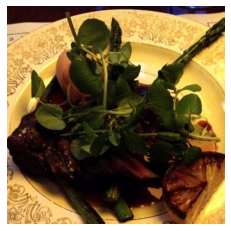

In [9]:
img = view_random_image('pizza_steak/train/','steak')

In [10]:
img

array([[[ 44,  15,  19],
        [ 35,   6,  10],
        [ 33,   2,   7],
        ...,
        [ 36,  10,  11],
        [ 34,   8,   9],
        [ 35,   6,   8]],

       [[ 33,   4,   6],
        [ 33,   4,   6],
        [ 37,   7,   9],
        ...,
        [ 37,  11,  12],
        [ 41,  12,  14],
        [ 41,  12,  14]],

       [[ 35,   6,   8],
        [ 34,   5,   7],
        [ 34,   4,   6],
        ...,
        [ 38,   9,  11],
        [ 39,  10,  12],
        [ 39,   9,  11]],

       ...,

       [[214, 173, 109],
        [197, 156,  92],
        [168, 124,  61],
        ...,
        [240, 187, 107],
        [225, 172,  94],
        [223, 170,  92]],

       [[195, 154,  92],
        [179, 138,  76],
        [170, 126,  65],
        ...,
        [243, 192, 113],
        [231, 179, 103],
        [222, 170,  94]],

       [[180, 139,  77],
        [186, 145,  83],
        [191, 146,  87],
        ...,
        [235, 184, 105],
        [236, 184, 108],
        [235, 186, 109]]

In [11]:
img.shape

(512, 512, 3)

In [12]:
img/255

array([[[0.17254902, 0.05882353, 0.0745098 ],
        [0.1372549 , 0.02352941, 0.03921569],
        [0.12941176, 0.00784314, 0.02745098],
        ...,
        [0.14117647, 0.03921569, 0.04313725],
        [0.13333333, 0.03137255, 0.03529412],
        [0.1372549 , 0.02352941, 0.03137255]],

       [[0.12941176, 0.01568627, 0.02352941],
        [0.12941176, 0.01568627, 0.02352941],
        [0.14509804, 0.02745098, 0.03529412],
        ...,
        [0.14509804, 0.04313725, 0.04705882],
        [0.16078431, 0.04705882, 0.05490196],
        [0.16078431, 0.04705882, 0.05490196]],

       [[0.1372549 , 0.02352941, 0.03137255],
        [0.13333333, 0.01960784, 0.02745098],
        [0.13333333, 0.01568627, 0.02352941],
        ...,
        [0.14901961, 0.03529412, 0.04313725],
        [0.15294118, 0.03921569, 0.04705882],
        [0.15294118, 0.03529412, 0.04313725]],

       ...,

       [[0.83921569, 0.67843137, 0.42745098],
        [0.77254902, 0.61176471, 0.36078431],
        [0.65882353, 0

In [13]:
from tensorflow.python.ops.gen_math_ops import sigmoid
from warnings import filters
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1.0/255)
valid_datagen = ImageDataGenerator(rescale = 1.0/255)

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data = train_datagen.flow_from_directory(train_dir,batch_size = 32, target_size=(224,224),class_mode = 'binary',seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32, target_size = (224,224), class_mode = 'binary', seed = 42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,kernel_size= 3,activation = 'relu',input_shape = (224,224,3)),
                               tf.keras.layers.Conv2D(10,3,activation = 'relu'),
                               tf.keras.layers.MaxPool2D(pool_size = 2,padding = 'valid'),
                               tf.keras.layers.Conv2D(10,3,activation = 'relu'),
                               tf.keras.layers.Conv2D(10,3,activation = 'relu'),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation = sigmoid)
])

model_1.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_1 = model_1.fit(train_data,epochs = 5, steps_per_epoch = len(train_data),validation_data = valid_data, validation_steps = len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 208ms/step - loss: 0.6286 - accuracy: 0.6280 - val_loss: 0.4289 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4369 - accuracy: 0.8013 - val_loss: 0.3521 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3822 - accuracy: 0.8247 - val_loss: 0.3110 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3493 - accuracy: 0.8520 - val_loss: 0.3388 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 9s 192ms/step - loss: 0.3231 - accuracy: 0.8687 - val_loss: 0.3073 - val_accuracy: 0.8700


In [14]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224,224,3)),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_2 = model_2.fit(train_data,epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 211ms/step - loss: 2.8241 - accuracy: 0.5047 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 17s 364ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 14s 287ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 15s 324ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [15]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape = (224,224,3)),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(100, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
])


model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)


history_3 = model_3.fit(train_data,epochs = 5,steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 272ms/step - loss: 2.4554 - accuracy: 0.6320 - val_loss: 0.9557 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 13s 277ms/step - loss: 0.7003 - accuracy: 0.7080 - val_loss: 0.4607 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 12s 267ms/step - loss: 0.6083 - accuracy: 0.7227 - val_loss: 0.5834 - val_accuracy: 0.6760
Epoch 4/5
47/47 [==============================] - 13s 274ms/step - loss: 0.9128 - accuracy: 0.6800 - val_loss: 0.8849 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.5602 - accuracy: 0.7600 - val_loss: 0.4570 - val_accuracy: 0.7860


Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


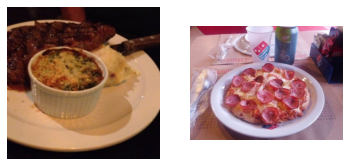

In [16]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/",'pizza')

In [17]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [18]:
train_data = train_datagen.flow_from_directory(directory = train_dir, target_size=(224,224), class_mode = 'binary',batch_size = 32)
test_data = valid_datagen.flow_from_directory(directory = test_dir, target_size = (224,224), class_mode = 'binary', batch_size =32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [20]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [21]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential


model_4 = Sequential([
                      Conv2D(filters = 10, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu', input_shape = (224,224,3)),
                      Conv2D(10,3, activation = 'relu'),
                      Conv2D(10,3, activation = 'relu'),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')
])


model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

len(train_data), len(test_data)

(47, 16)

In [23]:
history_4 = model_4.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 219ms/step - loss: 0.9104 - accuracy: 0.7113 - val_loss: 0.4554 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4180 - accuracy: 0.8153 - val_loss: 0.4071 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 17s 365ms/step - loss: 0.3303 - accuracy: 0.8667 - val_loss: 0.3728 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 14s 281ms/step - loss: 0.1659 - accuracy: 0.9473 - val_loss: 0.5052 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 12s 266ms/step - loss: 0.0664 - accuracy: 0.9827 - val_loss: 0.6426 - val_accuracy: 0.7360


In [24]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs,loss,label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'vsl_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()


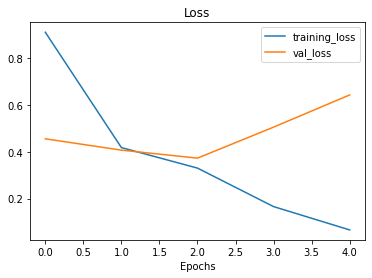

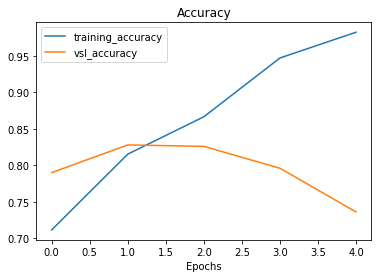

In [25]:
plot_loss_curves(history_4)

In [26]:
model_5 = Sequential([
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(pool_size = 2),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10,3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')
])


model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_5 = model_5.fit(train_data,epochs = 5, steps_per_epoch = len(train_data),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 0.6404 - accuracy: 0.6107 - val_loss: 0.4834 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4935 - accuracy: 0.7793 - val_loss: 0.4109 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 12s 250ms/step - loss: 0.4462 - accuracy: 0.8040 - val_loss: 0.4040 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 14s 297ms/step - loss: 0.4444 - accuracy: 0.8053 - val_loss: 0.3828 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 14s 286ms/step - loss: 0.4028 - accuracy: 0.8320 - val_loss: 0.3575 - val_accuracy: 0.8460


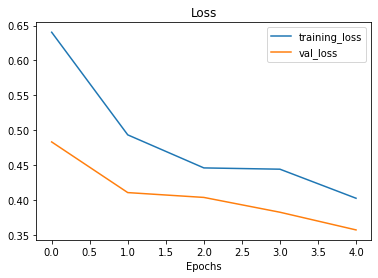

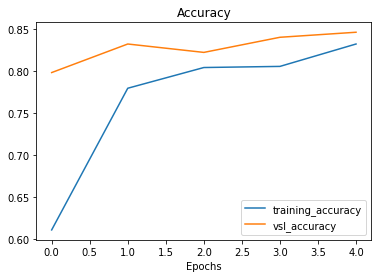

In [27]:
plot_loss_curves(history_5)

In [28]:
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [29]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size = (224,224),batch_size = 32, class_mode = 'binary', shuffle = False)

train_data = train_datagen.flow_from_directory(train_dir,target_size = (224,224),batch_size = 32, class_mode = 'binary', shuffle = False)

test_data = test_datagen.flow_from_directory(test_dir,target_size = (224,224),batch_size = 32, class_mode = 'binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

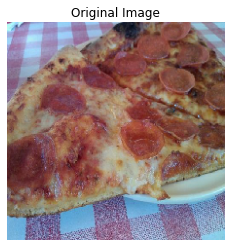

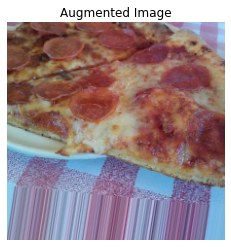

In [31]:
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [32]:
model_6 = tf.keras.Sequential([
    Conv2D(10,3,activation = 'relu',input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = tf.keras.activations.sigmoid)    
])

model_6.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_6 = model_6.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 28s 583ms/step - loss: 0.7089 - accuracy: 0.4487 - val_loss: 0.6898 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 33s 697ms/step - loss: 0.6948 - accuracy: 0.5267 - val_loss: 0.6839 - val_accuracy: 0.5900
Epoch 3/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6900 - accuracy: 0.5760 - val_loss: 0.6752 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 32s 676ms/step - loss: 0.6871 - accuracy: 0.5860 - val_loss: 0.6394 - val_accuracy: 0.7300
Epoch 5/5
47/47 [==============================] - 28s 609ms/step - loss: 0.6697 - accuracy: 0.6147 - val_loss: 0.5843 - val_accuracy: 0.8060


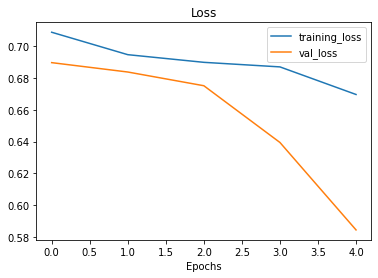

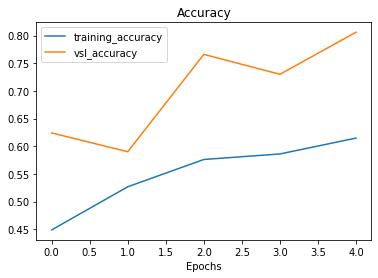

In [33]:
plot_loss_curves(history_6)

In [34]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)

Found 1500 images belonging to 2 classes.


In [35]:
model_7 = tf.keras.Sequential([
    Conv2D(10,3,activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

model_7.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch = len(test_data),
    validation_data = test_data,
    validation_steps = len(test_data)
    )

Epoch 1/5
16/16 [==============================] - 10s 602ms/step - loss: 0.6843 - accuracy: 0.5352 - val_loss: 0.6546 - val_accuracy: 0.5780
Epoch 2/5
16/16 [==============================] - 9s 577ms/step - loss: 0.6517 - accuracy: 0.6074 - val_loss: 0.6186 - val_accuracy: 0.6600
Epoch 3/5
16/16 [==============================] - 9s 575ms/step - loss: 0.6064 - accuracy: 0.6738 - val_loss: 0.5038 - val_accuracy: 0.7860
Epoch 4/5
16/16 [==============================] - 10s 606ms/step - loss: 0.5528 - accuracy: 0.7264 - val_loss: 0.4415 - val_accuracy: 0.7940
Epoch 5/5
16/16 [==============================] - 9s 570ms/step - loss: 0.5402 - accuracy: 0.7185 - val_loss: 0.5361 - val_accuracy: 0.7240


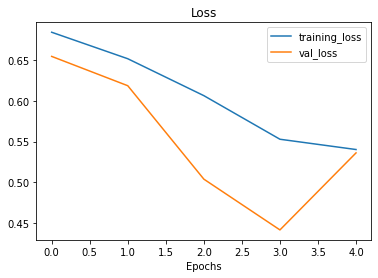

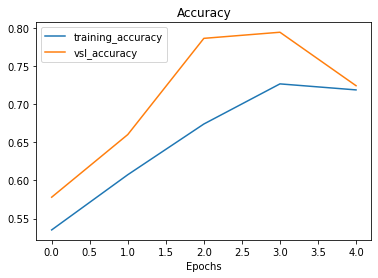

In [36]:
plot_loss_curves(history_7)

In [37]:
model_8 = tf.keras.Sequential([
    Conv2D(10,3,activation = 'relu',input_shape = (224,224,3)),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])


model_8.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)


history_8 = model_8.fit(
    train_data_augmented_shuffled,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6561 - accuracy: 0.6027 - val_loss: 0.5263 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 23s 484ms/step - loss: 0.5677 - accuracy: 0.7133 - val_loss: 0.4321 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5053 - accuracy: 0.7693 - val_loss: 0.3985 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 22s 477ms/step - loss: 0.5284 - accuracy: 0.7500 - val_loss: 0.4106 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 23s 497ms/step - loss: 0.4999 - accuracy: 0.7660 - val_loss: 0.3767 - val_accuracy: 0.8340


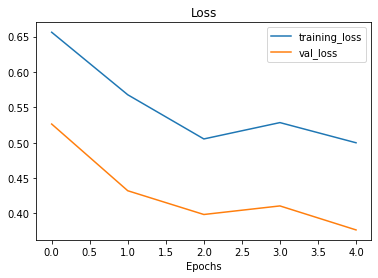

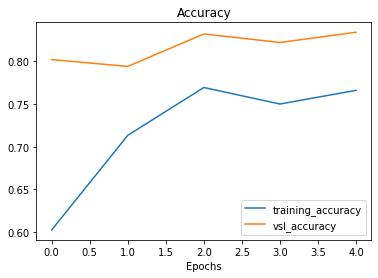

In [38]:
plot_loss_curves(history_8)

--2022-09-14 16:07:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-09-14 16:07:00 (50.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



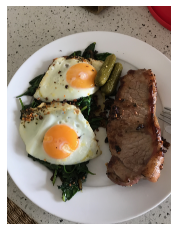

In [39]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [40]:
def load_and_prep_image(filename, image_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img,channels = 3)
  img = tf.image.resize(img, size = [image_shape,image_shape])
  img = img/255
  return img

In [41]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [42]:
model_8.predict(steak)

ValueError: ignored

In [43]:
print(steak.shape)
steak = tf.expand_dims(steak,axis = 0)
print(steak.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [44]:
model_8.predict(steak)

array([[0.8104874]], dtype=float32)

In [45]:
def pred_and_plot(model,filename,class_names):
  img =load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis = 0))
  pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(pred_class)
  plt.axis(False)

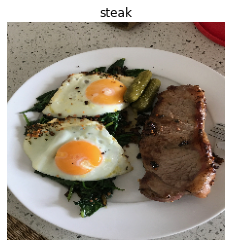

In [46]:
pred_and_plot(model_8,'03-steak.jpeg',class_names)

--2022-09-14 16:07:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2022-09-14 16:07:56 (60.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



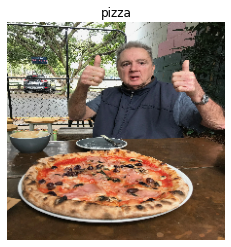

In [47]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

In [48]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-14 16:08:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.199.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   159MB/s    in 3.1s    

2022-09-14 16:08:08 (159 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [49]:
import os

for dirpath,dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(dirpath, dirnames, filenames)

10_food_classes_all_data ['train', 'test'] []
10_food_classes_all_data/train ['pizza', 'fried_rice', 'ice_cream', 'grilled_salmon', 'ramen', 'steak', 'hamburger', 'sushi', 'chicken_wings', 'chicken_curry'] []
10_food_classes_all_data/train/pizza [] ['233143.jpg', '1763205.jpg', '1980167.jpg', '3653643.jpg', '2432061.jpg', '382829.jpg', '1325918.jpg', '3314535.jpg', '1671531.jpg', '874288.jpg', '998719.jpg', '3256974.jpg', '2285942.jpg', '27963.jpg', '656817.jpg', '712149.jpg', '3185774.jpg', '3366256.jpg', '857888.jpg', '214728.jpg', '2924941.jpg', '3426946.jpg', '169720.jpg', '329302.jpg', '141507.jpg', '93961.jpg', '1390308.jpg', '2622336.jpg', '2785084.jpg', '3473991.jpg', '3337370.jpg', '2490163.jpg', '790841.jpg', '1504421.jpg', '2827938.jpg', '1040878.jpg', '1243215.jpg', '1029698.jpg', '2574896.jpg', '3699992.jpg', '2881282.jpg', '3000535.jpg', '717350.jpg', '3342039.jpg', '134462.jpg', '3530210.jpg', '1987634.jpg', '1686908.jpg', '1351146.jpg', '2190018.jpg', '2885050.jpg', '31

In [50]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [51]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


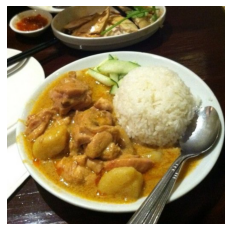

In [52]:
import random 
img = view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size = (224,224),batch_size = 32, class_mode = 'categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size = (224,224), batch_size = 32, class_mode = 'categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [54]:
model_9 = Sequential([
    Conv2D(10,3, activation = 'relu', input_shape = (224,224,3)),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])


model_9.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

hostory_9 = model_9.fit(train_data,epochs = 5,steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 193ms/step - loss: 2.2158 - accuracy: 0.1781 - val_loss: 2.0289 - val_accuracy: 0.2780
Epoch 2/5
235/235 [==============================] - 47s 199ms/step - loss: 1.9468 - accuracy: 0.3173 - val_loss: 1.9744 - val_accuracy: 0.3072
Epoch 3/5
235/235 [==============================] - 47s 200ms/step - loss: 1.6093 - accuracy: 0.4488 - val_loss: 2.0701 - val_accuracy: 0.3156
Epoch 4/5
235/235 [==============================] - 46s 197ms/step - loss: 0.9984 - accuracy: 0.6697 - val_loss: 2.5754 - val_accuracy: 0.2620
Epoch 5/5
235/235 [==============================] - 55s 233ms/step - loss: 0.3914 - accuracy: 0.8829 - val_loss: 3.8129 - val_accuracy: 0.2500


In [55]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 3.8129 - accuracy: 0.2500


[3.8129143714904785, 0.25]

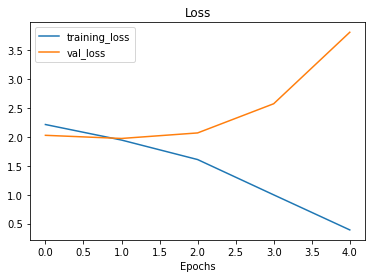

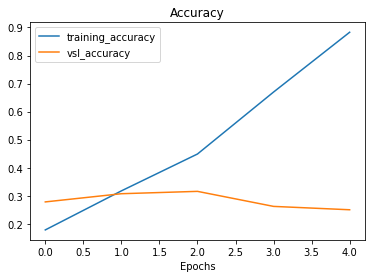

In [57]:
plot_loss_curves(hostory_9)

In [60]:
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 184ms/step - loss: 2.1326 - accuracy: 0.2528 - val_loss: 1.9524 - val_accuracy: 0.2940
Epoch 2/5
235/235 [==============================] - 43s 182ms/step - loss: 1.8006 - accuracy: 0.3896 - val_loss: 1.8845 - val_accuracy: 0.3444
Epoch 3/5
235/235 [==============================] - 49s 207ms/step - loss: 1.5186 - accuracy: 0.4989 - val_loss: 1.8608 - val_accuracy: 0.3708
Epoch 4/5
235/235 [==============================] - 46s 194ms/step - loss: 1.1124 - accuracy: 0.6496 - val_loss: 2.0514 - val_accuracy: 0.3288
Epoch 5/5
235/235 [==============================] - 45s 193ms/step - loss: 0.6508 - accuracy: 0.8144 - val_loss: 2.4491 - val_accuracy: 0.3156


In [ ]:
plot_loss_curves(history_10)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,rotation_range= 20,width_shift_range = 0.2, height_shift_range= 0.2, zoom_range = 0.2,horizontal_flip = True)

train_data_augmented = train_data_augmented.flow_from_directory(train_dir, target_size = (224,224), batch_size = 32, class_mode = 'categorical')

In [ ]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizer.Adam(),
    metrics = ['accuracy']
)


history_11 = model_11.fit(train_data_augmented, epochs = 5, steps_per_epoch = len(train_data_augmented), validation_data = test_data, validation_steps = len(test_data))

In [ ]:
plot_loss_curves(history_11)

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

In [ ]:
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);